In [21]:

import sqlite3 as sql
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
### Define the path to the file (a string in a variable 'db_file')
db_file = '../database/cortona_week.db'

In [3]:
### Créer une connexion vers la base de données
# Attention: si la base de données n'existe pas, elle est créée à l'endroit indiqué.
# Ce qui est une manière de la créer si souhaité
try:
    cn = sql.connect(db_file)
except Exception as e:
    print(e)    
# Le contenu de la variable: connexion
# cn

In [4]:
### La requête à effectuer
# Préparée généralement directement sur la BD SQLite
# Elle produit la liste des années de naissance,
# une année par individu
q1 = """
SELECT 
	p.name,
    p.pk_person,
	p.birth_date,
	p.gender, 
	p.nationality, 
	e.title, 
	e.pk_event,
	e.date,
	p2.description 
FROM
	Person p 
JOIN
	Participation p2 
ON
	p.pk_person = p2.fk_person 
JOIN 
	Event e 
on
	e.pk_event = p2.fk_event  
"""

In [5]:
### Création du conteneur du résultat de la requête
cur = cn.cursor()
cur

In [6]:
### Exécuter la requête et récupérer le résultat
cur.execute(q1)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()

In [7]:
### Inspecter le résultat:
# longueur, type du résultat et premières lignes du résultat
# On observe qu'il y a des trous et des répétitions:
# plusieurs personnes on la même année de naissance
print(len(r), '\n-----\n', type(r),  '\n-----\n', r[:5])
print((r[1][5]))


555 
-----
 <class 'list'> 
-----
 [('Pier Luigi Luisi', 1, 1938, 'm', 'Italien', 'Future Visions', 11, 1998, 'Organisation'), ('Pier Luigi Luisi', 1, 1938, 'm', 'Italien', 'Future Visions', 11, 1998, 'Workshop-Leiter'), ('Jörg Altherr-Flury', 2, 1944, 'm', None, 'Future Visions', 11, 1998, 'Workshop-Leiter'), ('Thea Altherr-Flury', 3, 1941, 'w', 'Schweiz', 'Future Visions', 11, 1998, 'Workshop-Leiter'), ('Shams Anwari-Alhossenyni', 4, 1937, 'm', None, 'Future Visions', 11, 1998, 'Workshop-Leiter')]
Future Visions


In [8]:
### create a new list that only contains people that attended a cortona conference
age_distribution=[]
cortona_events=tuple(range(1,31))
print(cortona_events)
for i in range(0,len(r)):
    if r[i][6] in cortona_events: 
        age_distribution.append(r[i])

print(len(age_distribution))
print(age_distribution[1:4])

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30)
485
[('Pier Luigi Luisi', 1, 1938, 'm', 'Italien', 'Future Visions', 11, 1998, 'Workshop-Leiter'), ('Jörg Altherr-Flury', 2, 1944, 'm', None, 'Future Visions', 11, 1998, 'Workshop-Leiter'), ('Thea Altherr-Flury', 3, 1941, 'w', 'Schweiz', 'Future Visions', 11, 1998, 'Workshop-Leiter')]


In [14]:
### create a new list in which a person is only found once per event even if they had mutiple functions
panda_data=pd.DataFrame(age_distribution, columns=['person_name', 
                                                   'person_id','birth_date',
                                                  'gender','nationality',
                                                  'event_title','event_id',
                                                  'event_date','event_role'])
#print(panda_data)

unique_panda_data=pd.DataFrame()

for i in range(1,31):
    temp_data=panda_data[panda_data['event_id']==i]
    unique_temp_data=temp_data.drop_duplicates('person_id')
    unique_panda_data=pd.concat([unique_panda_data,unique_temp_data],ignore_index=True)

#print(unique_panda_data)

unique_panda_data.replace('None',None)
#print(unique_panda_data)
unique_panda_data=unique_panda_data[unique_panda_data['birth_date']!= '']
print(unique_panda_data)
#.str.contains('')==False
no_nan_unique_panda_data=unique_panda_data[unique_panda_data['birth_date'].notna()]
print(no_nan_unique_panda_data.dtypes)
print(no_nan_unique_panda_data['birth_date'])
no_nan_unique_panda_data['birth_date']=no_nan_unique_panda_data['birth_date'].astype('float')



print(no_nan_unique_panda_data)

                    person_name  person_id birth_date gender  nationality  \
0              Pier Luigi Luisi          1       1938      m      Italien   
1                   Hans Primas         96       1928      m      Schweiz   
2              Walter Schneider         97       None   None         None   
3          Ulrich Müller-Herold         84       1943      m  Deutschland   
4                Eduard Freitag         93       None   None         None   
..                          ...        ...        ...    ...          ...   
433          David Steindl-Rast         34       1926      m   Österreich   
434          Michael Stillwater         35       None   None         None   
435              Horta van Hoye         60       None   None         None   
436  Regula Vollenweider Wepfer         54       None   None         None   
437        Cornelia Walterspiel         39       None      w  Deutschland   

    event_title  event_id  event_date       event_role  
0     Cortona 1   

/tmp/ipykernel_118/1979429864.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nan_unique_panda_data['birth_date']=no_nan_unique_panda_data['birth_date'].astype('float')


/tmp/ipykernel_118/3387377982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nan_unique_panda_data['birth_date']=no_nan_unique_panda_data['event_date']-no_nan_unique_panda_data['birth_date']


0      47.0
1      57.0
3      42.0
5      37.0
6      46.0
       ... 
414    60.0
415    55.0
420    57.0
422    69.0
433    79.0
Name: birth_date, Length: 273, dtype: float64


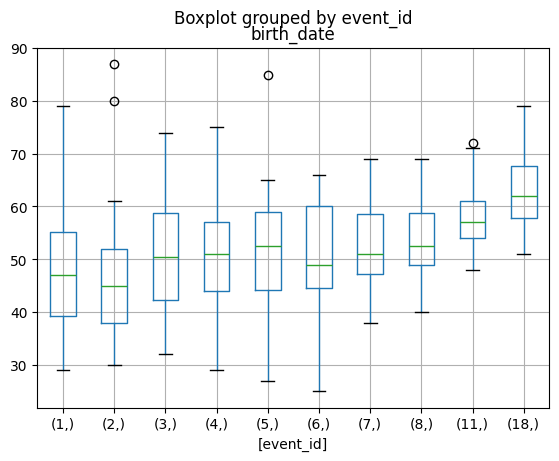

In [15]:
### create boxplots of age per event

no_nan_unique_panda_data['birth_date']=no_nan_unique_panda_data['event_date']-no_nan_unique_panda_data['birth_date'] 
boxplot=no_nan_unique_panda_data.boxplot(column=['birth_date'],by=['event_id'])

print(no_nan_unique_panda_data['birth_date'])



In [16]:
mean_age_per_event=[]
for i in range(1,19):
    mask=no_nan_unique_panda_data['event_id'] == i
    print(i)
    #mean_age_per_event.append(no_nan_unique_panda_data[mask].mean())
    print(no_nan_unique_panda_data[mask]['birth_date'].median())


1
47.0
2
45.0
3
50.5
4
51.0
5
52.5
6
49.0
7
51.0
8
52.5
9
nan
10
nan
11
57.0
12
nan
13
nan
14
nan
15
nan
16
nan
17
nan
18
62.0


In [27]:
grouped = no_nan_unique_panda_data['gender'].value_counts()
print(grouped)
sns.barplot(data=grouped, x="gender", y="event_id")
plt.title("Flights")
plt.show()

gender
m    192
w     81
Name: count, dtype: int64


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.